In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
knn_naive = pd.read_csv("../results/output_places_US_knn_naive.csv")
fast = pd.read_csv("../results_remote/output_places_US_knn.csv")
ckqst = pd.read_csv("../results_remote/output_places_US_ckqst.csv")


res = pd.concat([
    knn_naive.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])
res = res[res['name'].isin(['places_knn', 'fast_NO', 'ckqst_NO'])]

name_map = {
    "places_knn": "Naive",
    "fast_NO": "FAST",
    "ckqst_NO": "CkQST"
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

,creation_time,search_time,num_queries,name
0,172846812,12052553419,100000,Naive
1,490011624,92903556845,500000,Naive
2,901933066,198031281350,1000000,Naive
3,210519521,11660142249,100000,Naive
4,606187893,87374653715,500000,Naive
5,867310701,209452007862,1000000,Naive
6,2446234806,550983418726,2500000,Naive
7,295598693,8850511595,100000,Naive
8,442297750,72661776036,500000,Naive
9,981890953,211491503497,1000000,Naive


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

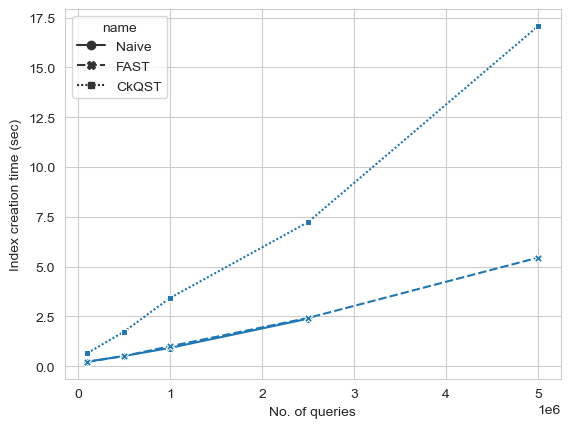

In [22]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [23]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,490011624,185807.113690,500000,Naive
4,606187893,174749.307430,500000,Naive
8,442297750,145323.552072,500000,Naive
2,506099114,60489.113896,500000,FAST
3,513611911,68362.891844,500000,FAST
2,1623953428,75817.013824,500000,CkQST
3,1855197461,73905.196494,500000,CkQST
4,1725044416,69224.593112,500000,CkQST


In [24]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
6,2446234806,550983418726,2500000,Naive
10,2320566598,613240169259,2500000,Naive
6,2501672940,203616863926,2500000,FAST
7,2341089073,243533633079,2500000,FAST
7,6161981959,221677652990,2500000,CkQST
8,7856627128,261453154149,2500000,CkQST
9,7688455039,274500113894,2500000,CkQST


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (ms)'>

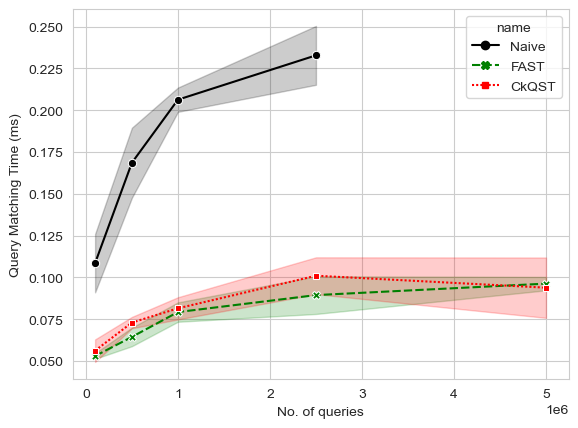

In [37]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar='sd', palette=['black', 'g', 'r'], markers=True)

In [26]:
# Optimization
# - Custom iterator
# - Circle bound calculation